In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [3]:
data = pd.read_csv("city_day.csv")
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [4]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.96

In [5]:
print("\nSample Data:")
print(data.head())


Sample Data:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


Data Cleaning

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [8]:
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_columns:
    if data[col].isnull().sum() > 0:  # Only impute if there are missing values
        data[col].fillna(data[col].median(), inplace=True)

In [9]:
# Impute categorical columns with mode (for example, City and AQI_Bucket)
if data['City'].isnull().sum() > 0:
    data['City'].fillna(data['City'].mode()[0], inplace=True)

In [10]:
if data['AQI_Bucket'].isnull().sum() > 0:
    data['AQI_Bucket'].fillna(data['AQI_Bucket'].mode()[0], inplace=True)

C:\Users\prgup\AppData\Local\Temp\ipykernel_5280\1104280268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AQI_Bucket'].fillna(data['AQI_Bucket'].mode()[0], inplace=True)


In [11]:
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [12]:
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   
1          Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   
2          Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85   
3          Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   
4          Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00  118.0      Moderate  
1       0.97  24.55   34.06     3.68     5.50    3.77  118.0      Moderate  
2      17.40  29.07   30.70     6.80    16.40    2.25  118.0      Moderate  
3       1.70  18.59   36.08     4.43    10.14    1.00  118.0      Moderate  
4      22.10  39.33   39.31     7.01    18.89    2.78  118.0      Moderate  
...      ...    ...     ...      ...      ...     ...    ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73   41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38   70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00   68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00   54.0  Satisfactory  
29530   0.59   2.10   17.05     1.07     2.97    0.98   50.0          Good  

[29531 rows x 16 columns]

In [13]:
# Check data types
print("\nData Types:")
print(data.dtypes)


Data Types:
City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


In [14]:
# Check and convert data types
# Check if 'Timestamp' is in the DataFrame's columns
if 'Timestamp' in data.columns:
    # If it is, proceed with conversion
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
else:
    # If not, print a message and identify potential timestamp columns
    print("Column 'Timestamp' not found in DataFrame.")
    print("Available columns:", data.columns)
    # You can update the code below to select the correct column
    # data['Timestamp'] = pd.to_datetime(data['<Your Timestamp Column Name>'])

Column 'Timestamp' not found in DataFrame.
Available columns: Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [15]:
data.head()

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  118.0   Moderate  
1  24.55   34.06     3.68     5.50    3.77  118.0   Moderate  
2  29.07   30.70     6.80    16.40    2.25  118.0   Moderate  
3  18.59   36.08     4.43    10.14    1.00  118.0   Moderate  
4  39.33   39.31     7.01    18.89    2.78  118.0   Moderate

Exploratory Data Analysis

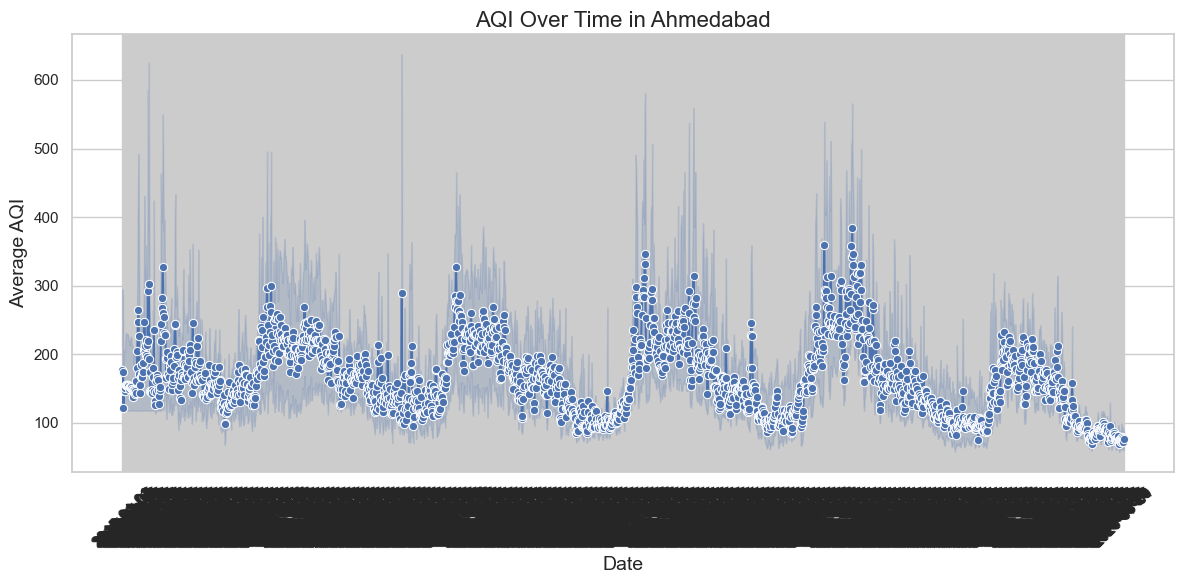

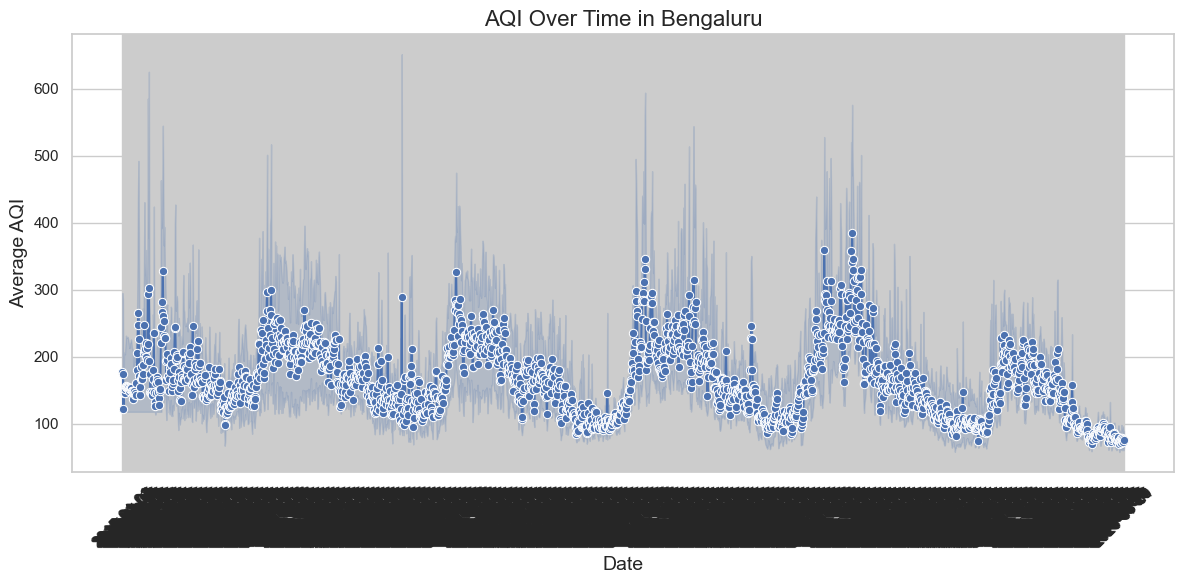

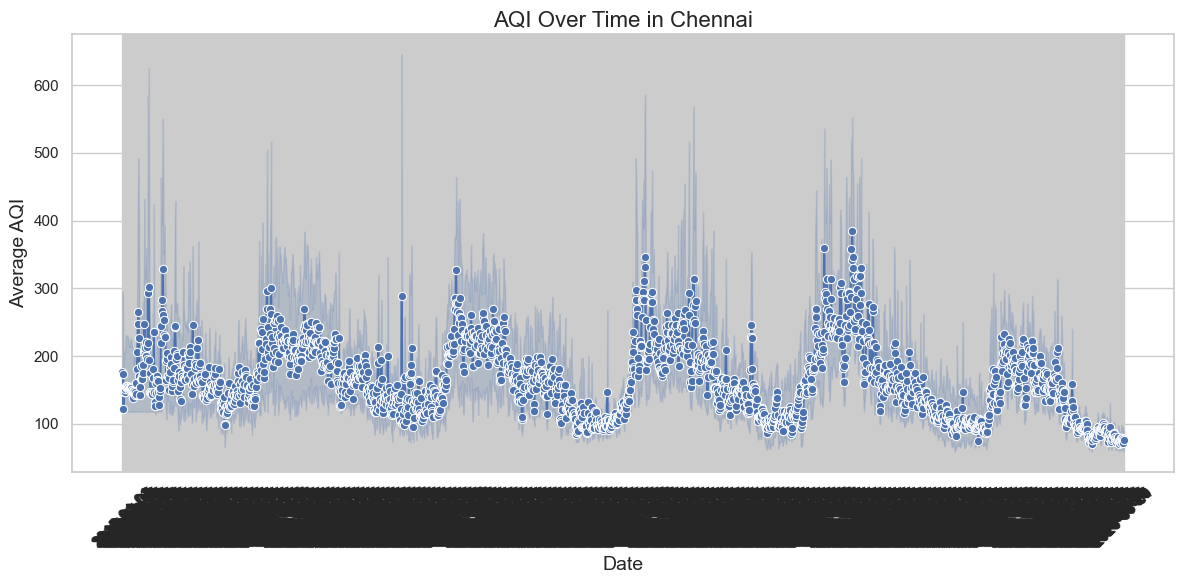

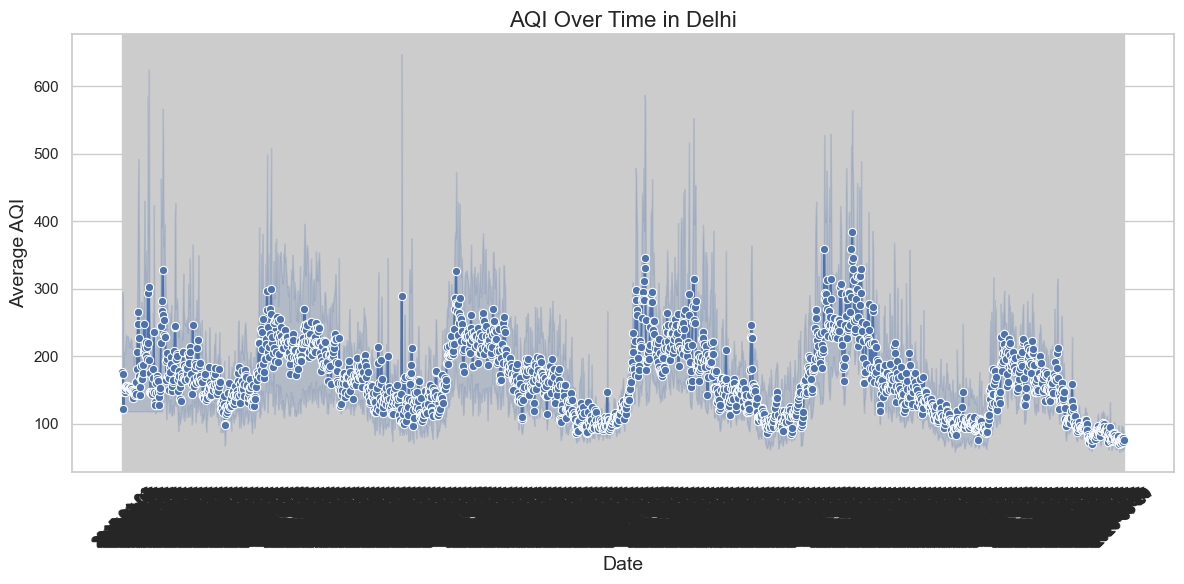

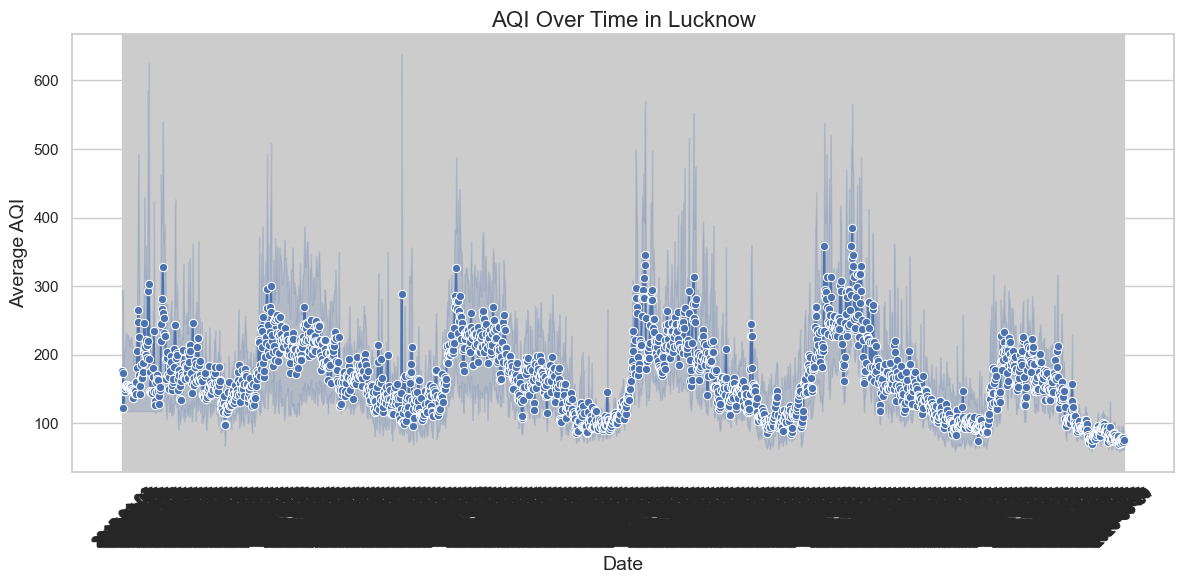

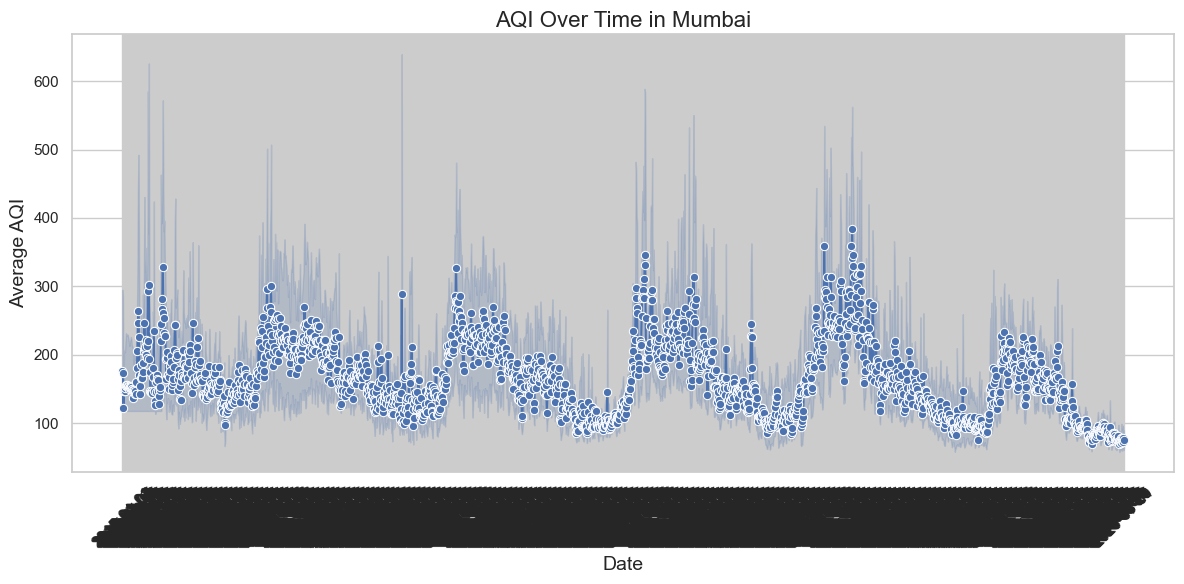

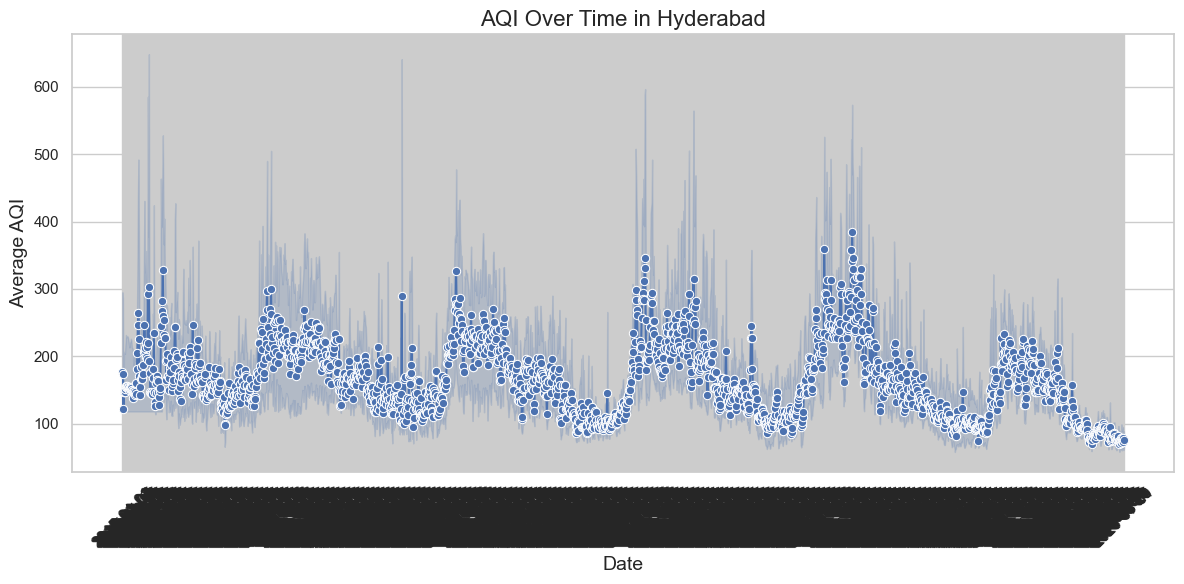

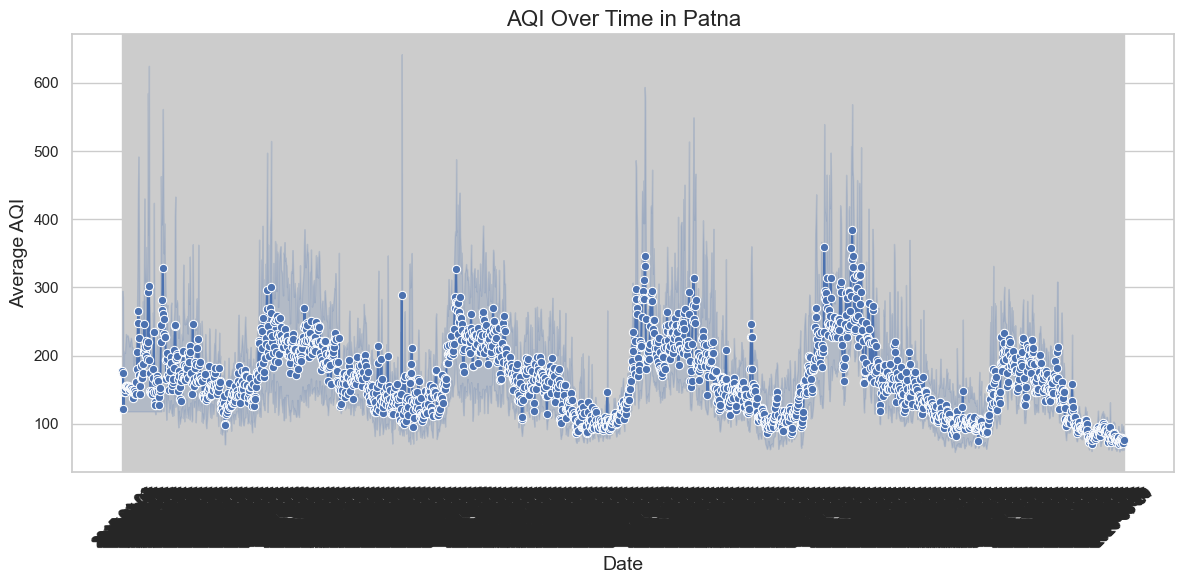

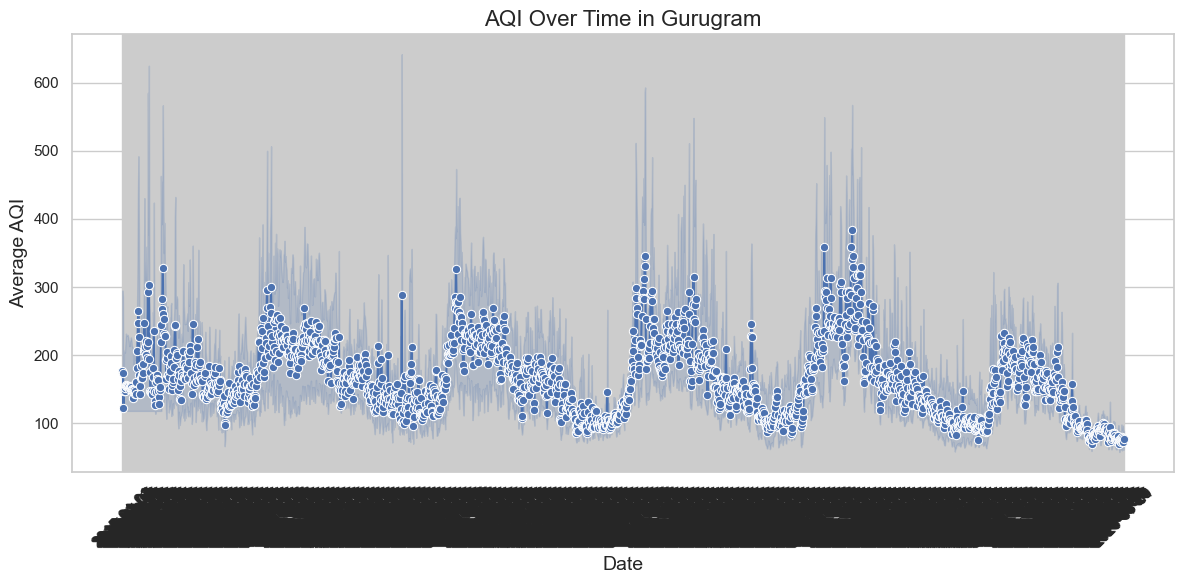

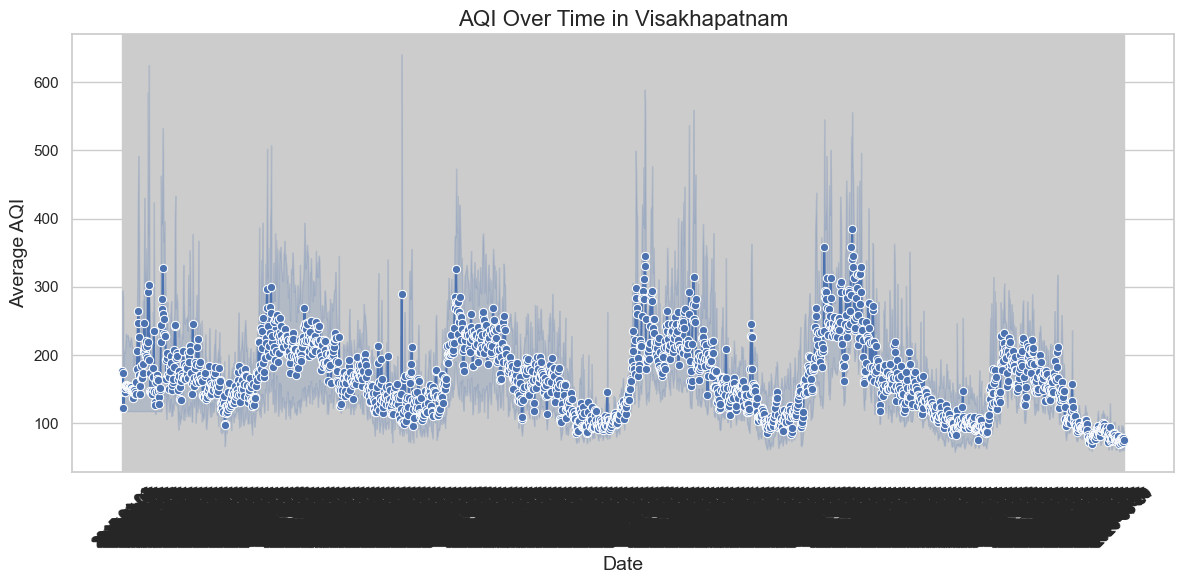

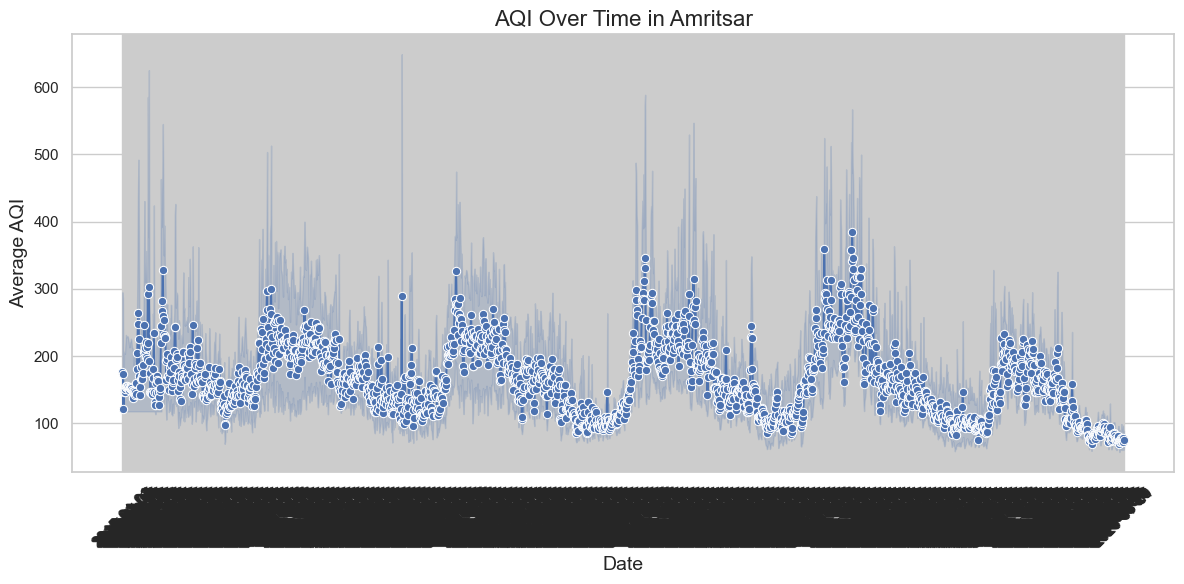

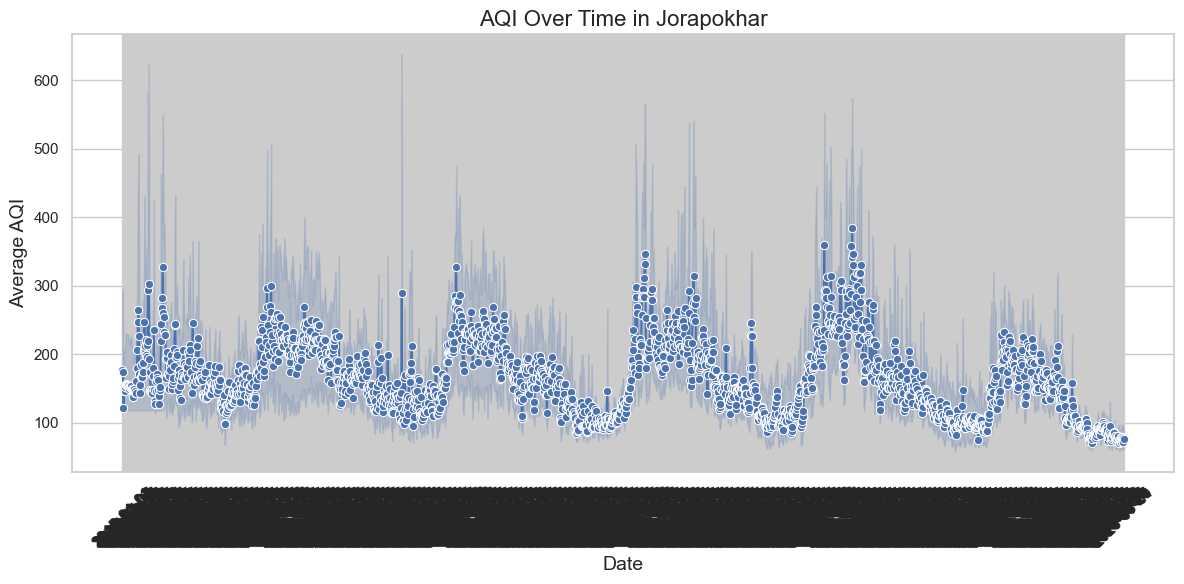

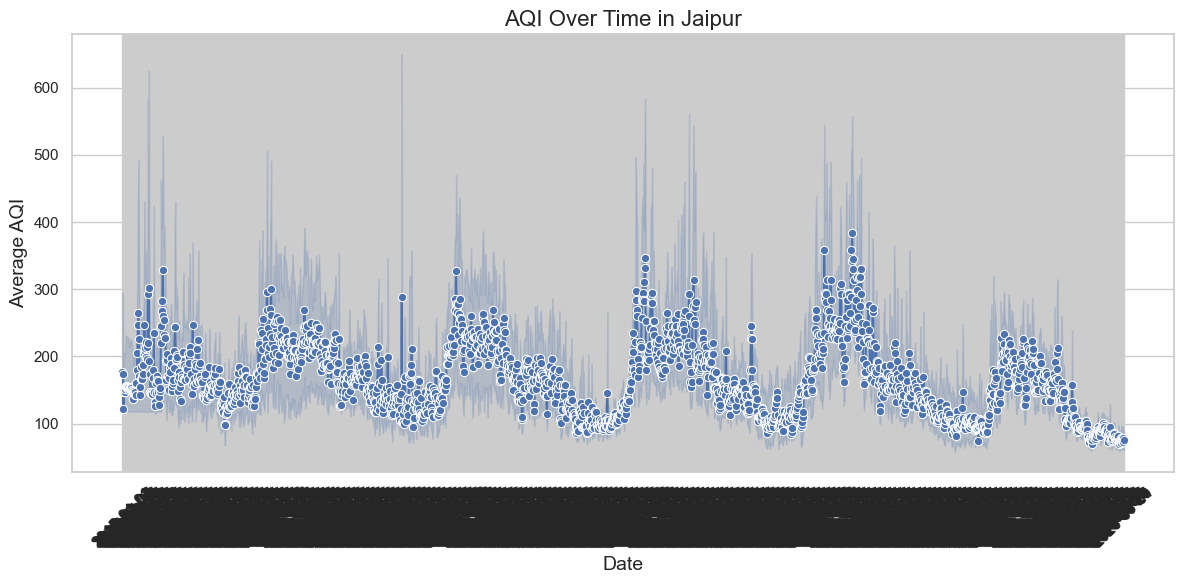

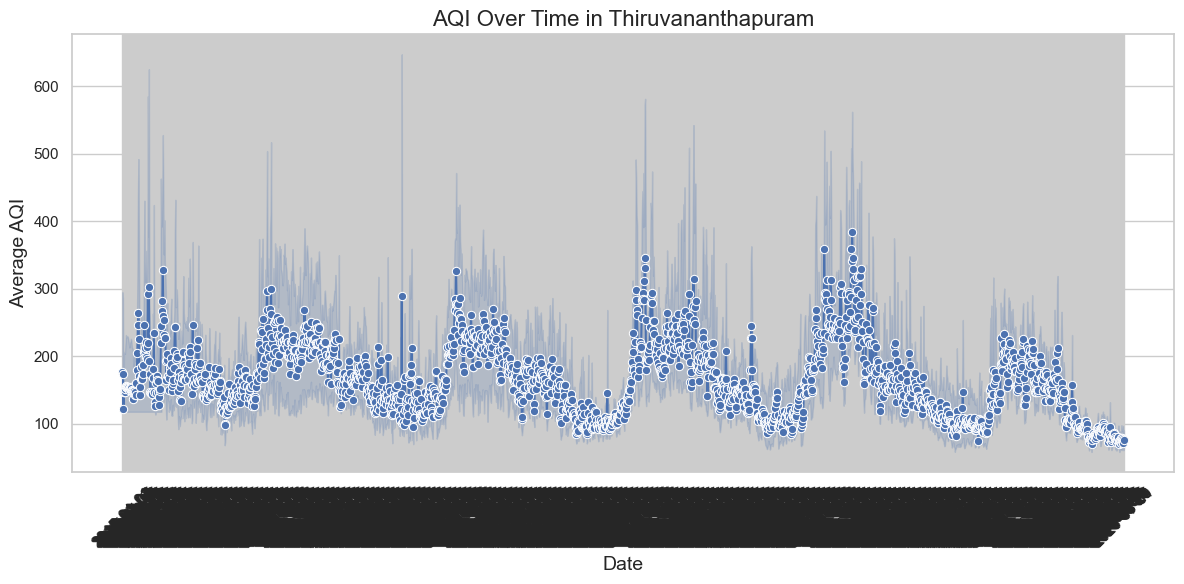

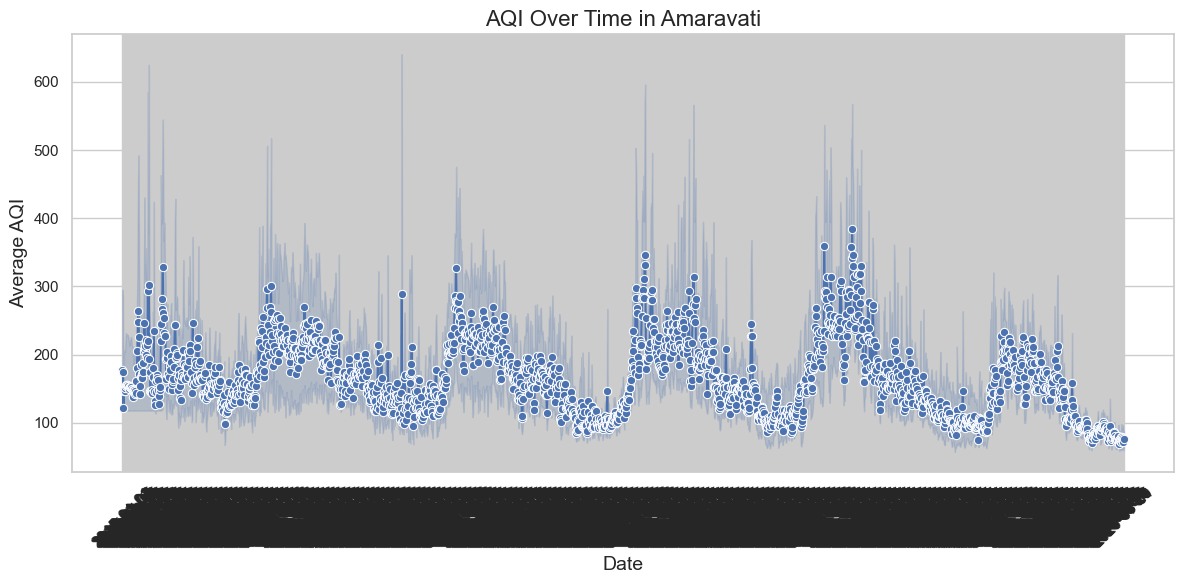

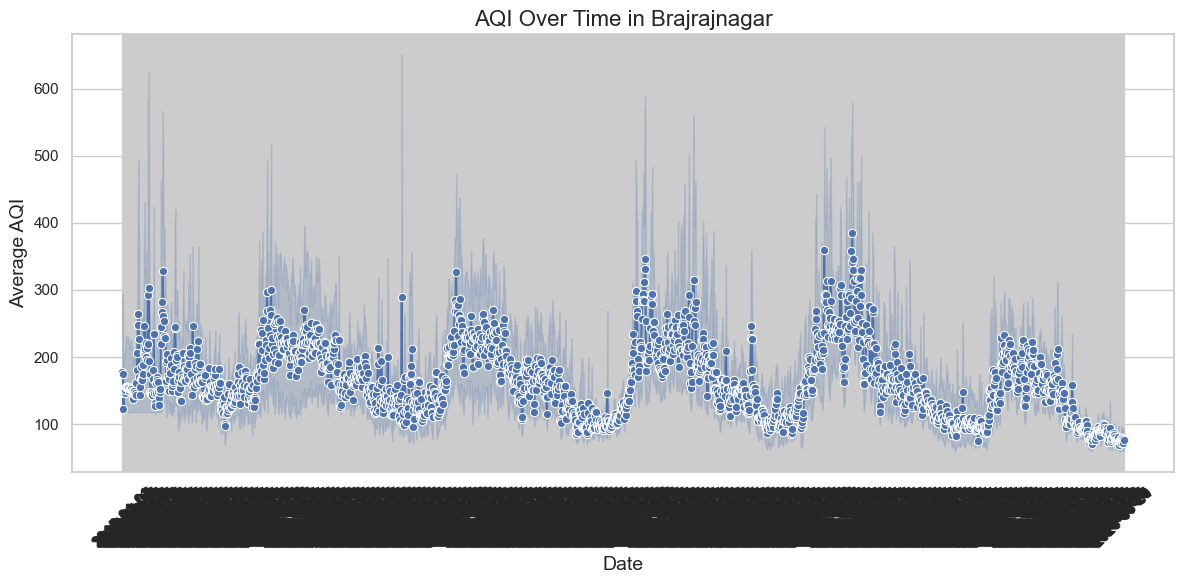

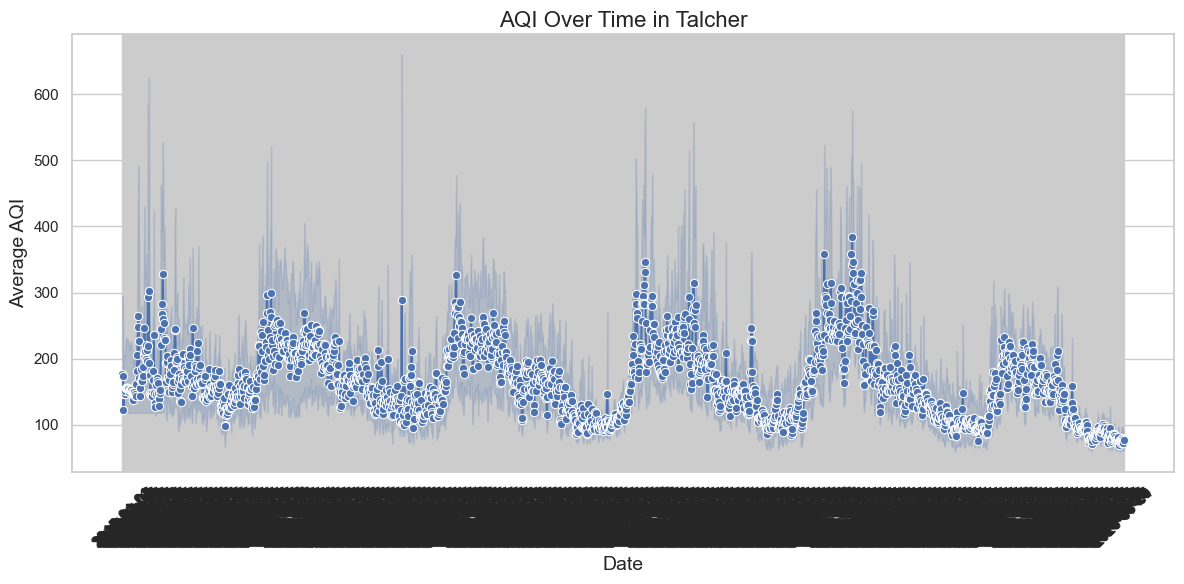

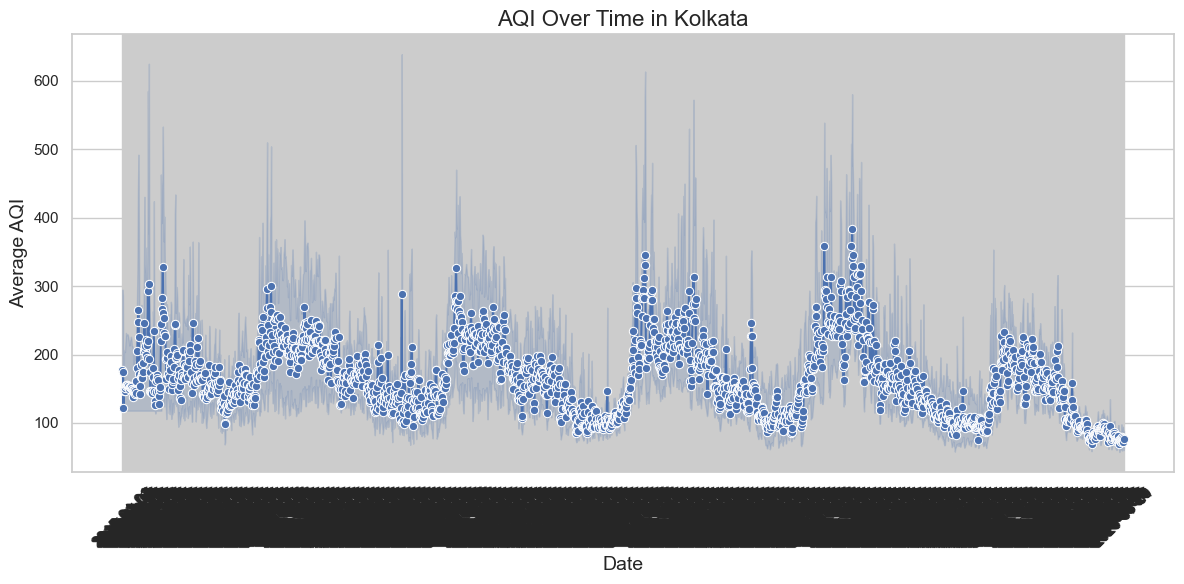

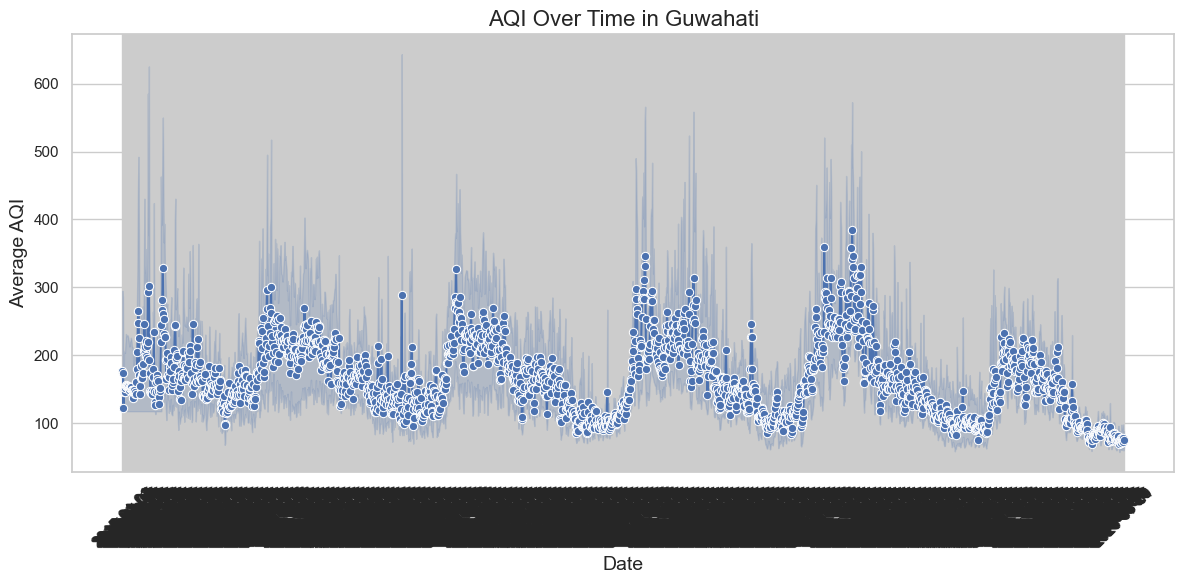

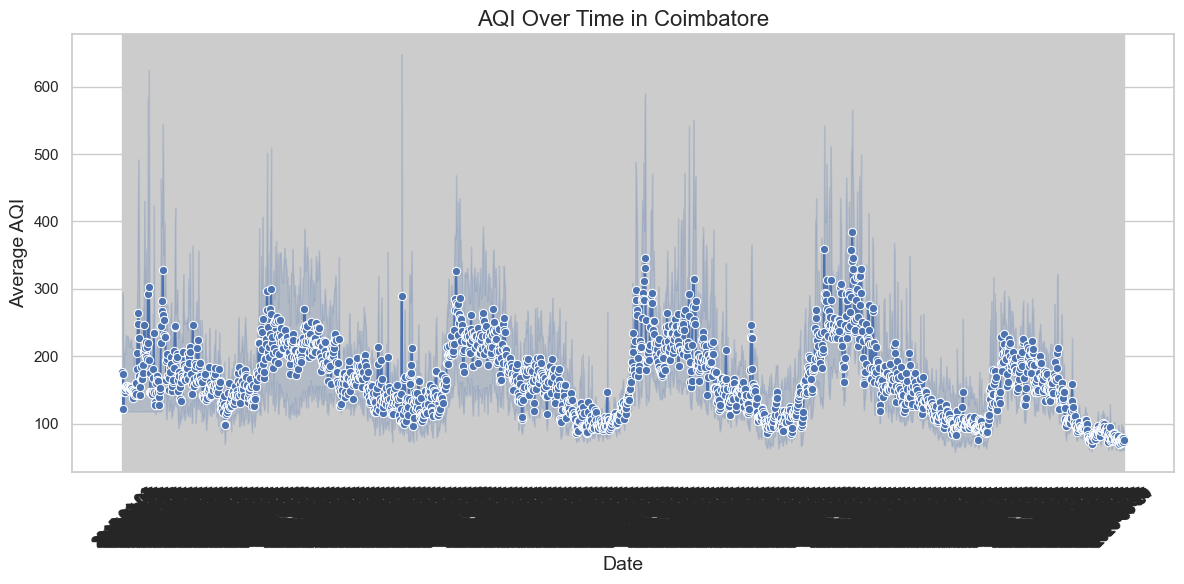

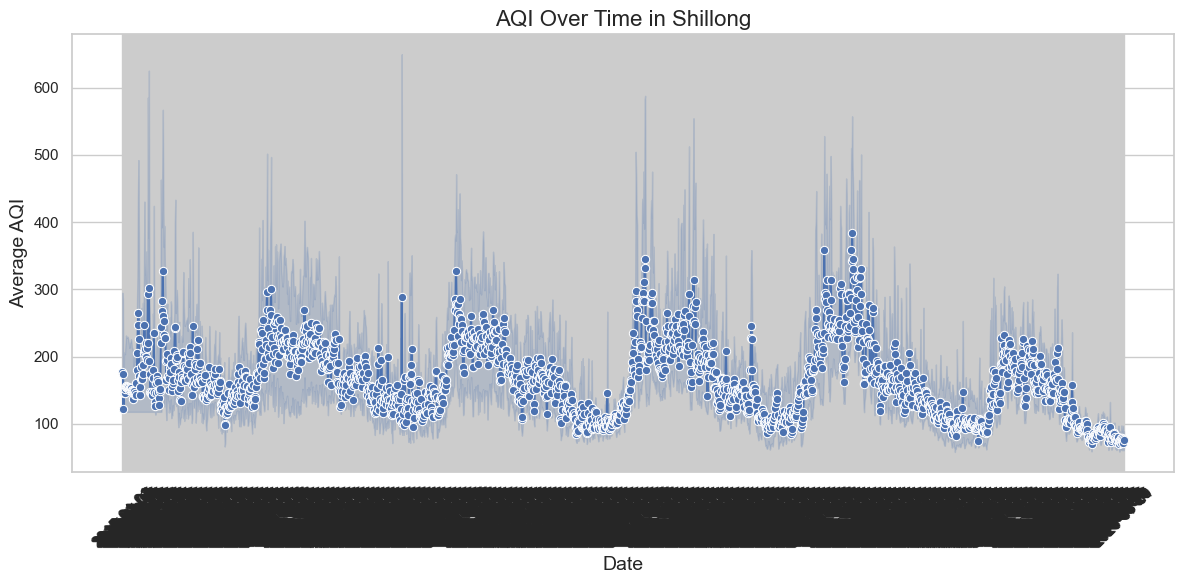

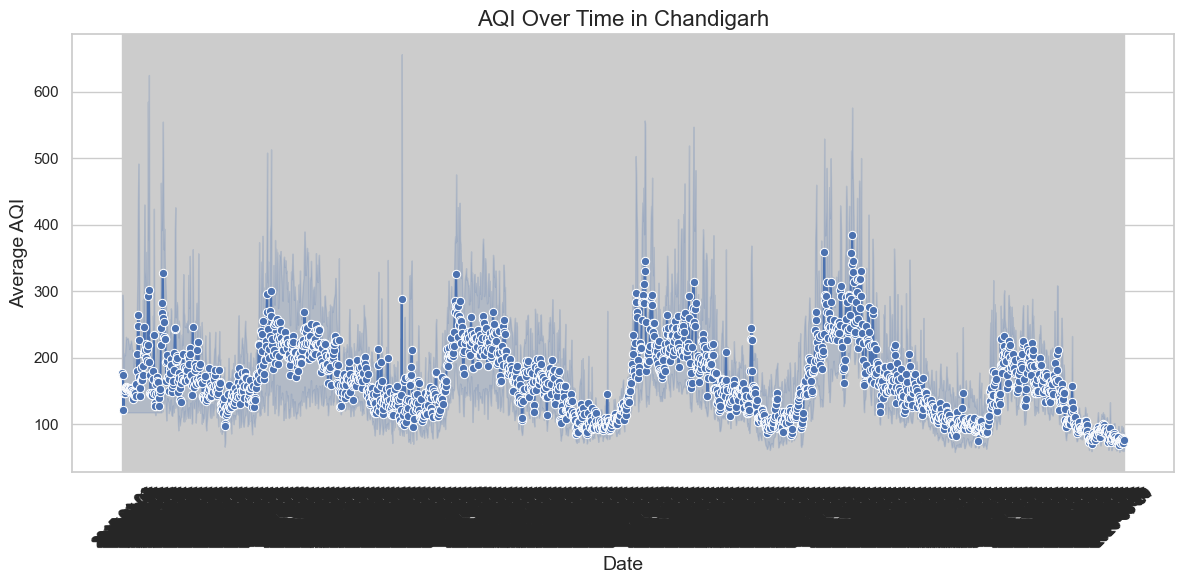

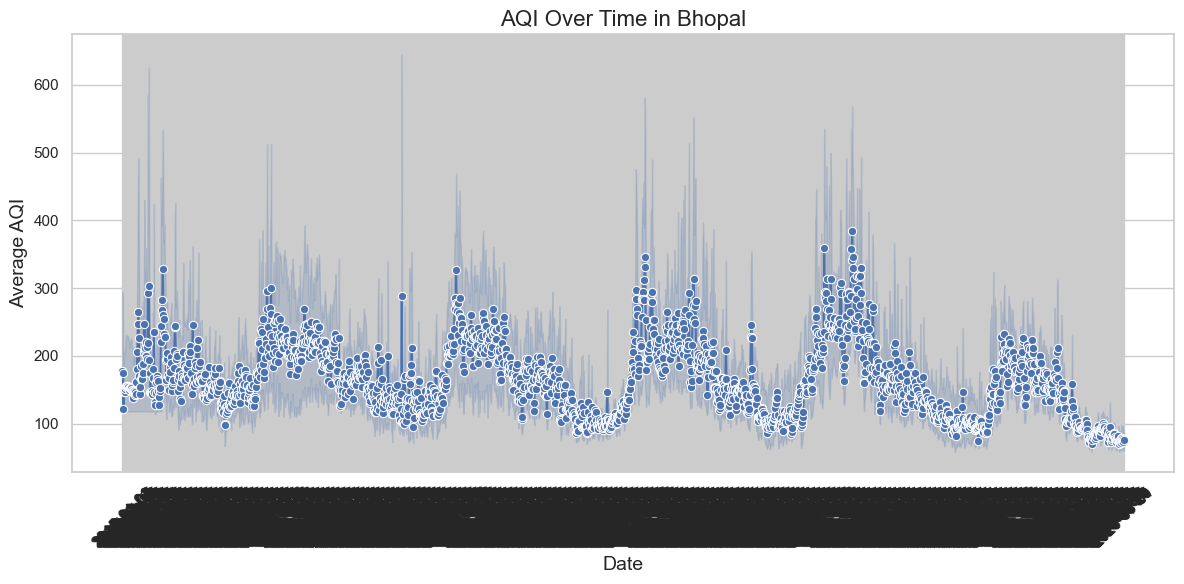

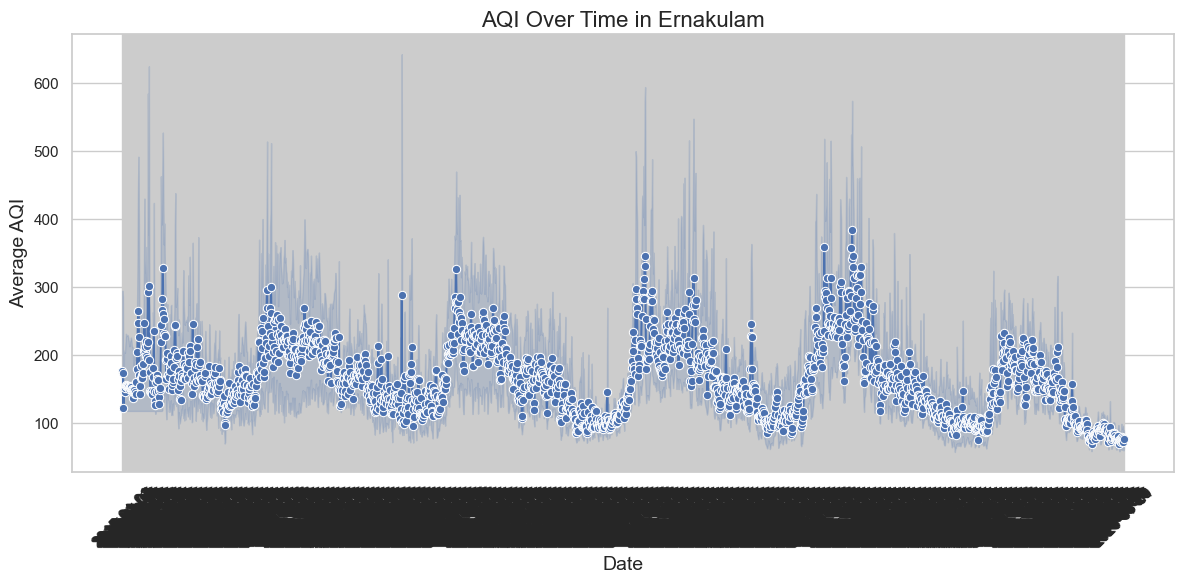

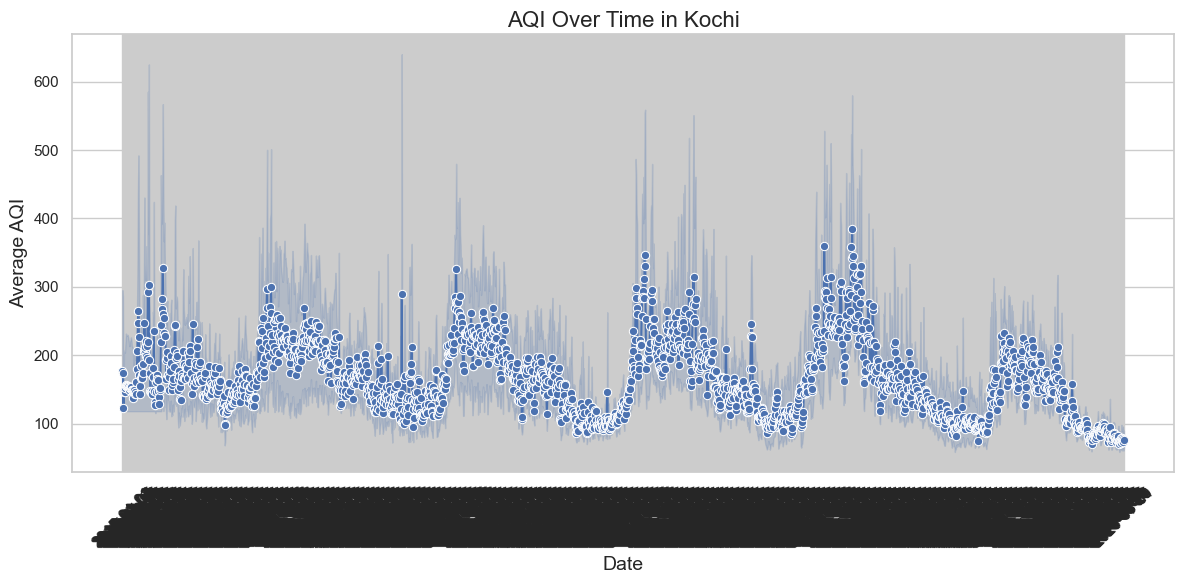

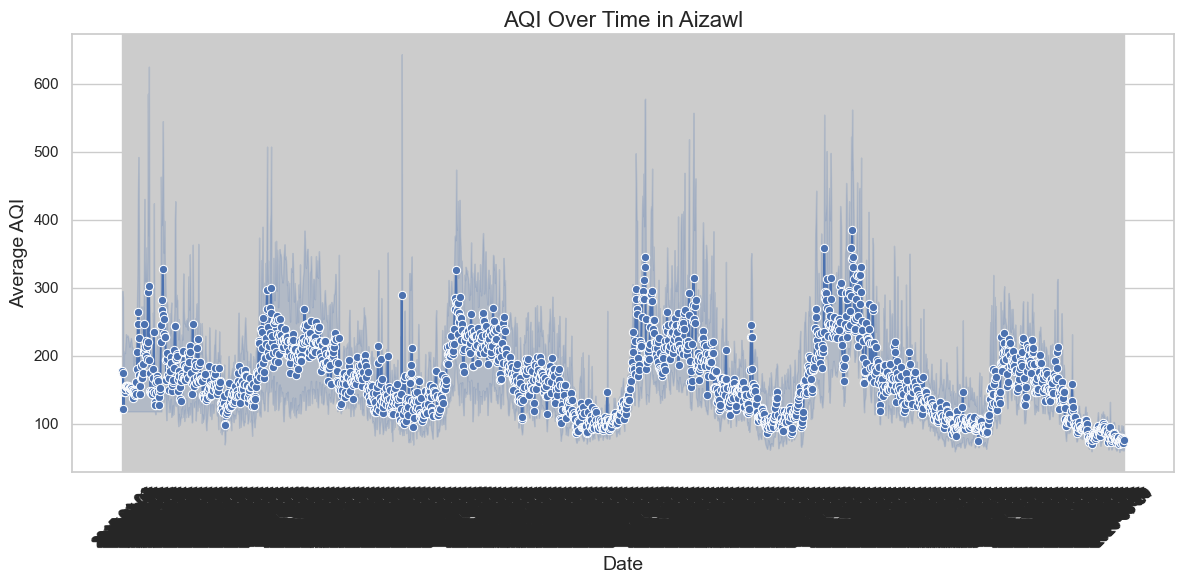

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Date and City and calculate mean AQI
city_aqi = data.groupby(['Date', 'City'])['AQI'].mean().reset_index()

# Get unique cities
cities = city_aqi['City'].unique()

# Set plot style
sns.set(style='whitegrid')

# Create separate graphs for each city
for city in cities:
    city_data = city_aqi[city_aqi['City'] == city]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='AQI', data=data, marker='o')
    plt.title(f'AQI Over Time in {city}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average AQI', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot for each city
    plt.show()


In [17]:
average_aqi = data.groupby('City')['AQI'].mean().reset_index()

# Sort the cities by average AQI
average_aqi = average_aqi.sort_values(by='AQI', ascending=False)

# Display the average AQI for each city
print("Average AQI for each city:")
for index, row in average_aqi.iterrows():
    print(f"{row['City']}: {row['AQI']:.2f}")

Average AQI for each city:
Ahmedabad: 339.86
Delhi: 258.78
Patna: 214.41
Lucknow: 212.20
Gurugram: 210.70
Talcher: 159.42
Jorapokhar: 145.21
Brajrajnagar: 142.54
Guwahati: 139.80
Kolkata: 138.90
Jaipur: 133.40
Bhopal: 132.26
Amritsar: 119.77
Visakhapatnam: 117.42
Chennai: 114.72
Mumbai: 113.12
Hyderabad: 109.76
Kochi: 104.62
Amaravati: 97.93
Chandigarh: 96.85
Bengaluru: 95.49
Ernakulam: 93.78
Thiruvananthapuram: 78.15
Coimbatore: 77.92
Shillong: 75.54
Aizawl: 36.24


C:\Users\prgup\AppData\Local\Temp\ipykernel_5280\1558319740.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='AQI', data=max_aqi, palette='viridis')


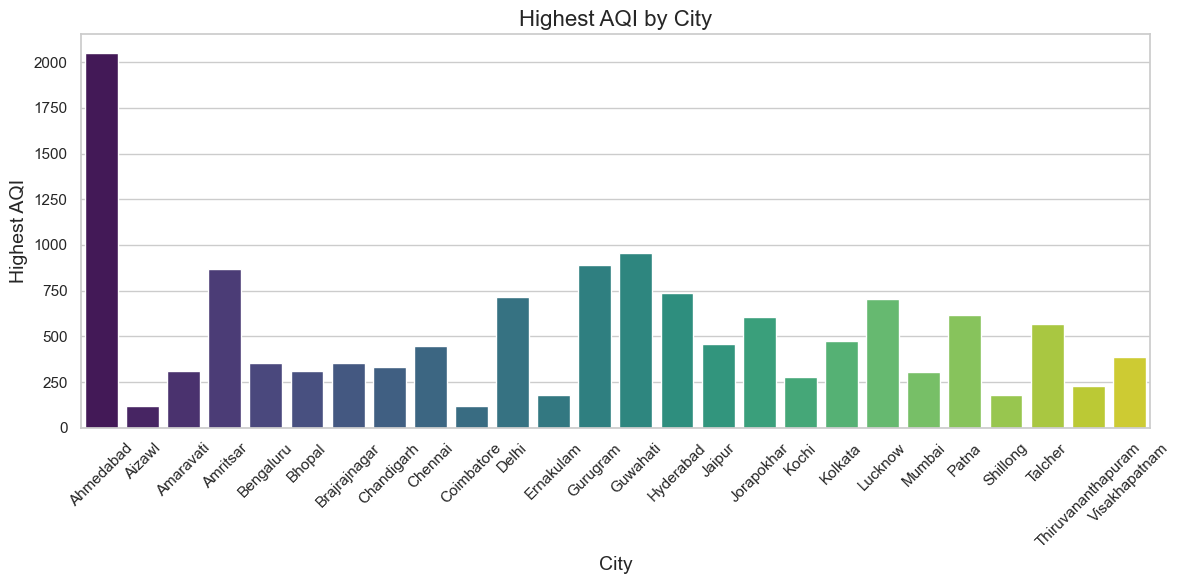

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by City and calculate the maximum AQI
max_aqi = data.groupby('City')['AQI'].max().reset_index()

# Set plot style
sns.set(style='whitegrid')

# Create the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='AQI', data=max_aqi, palette='viridis')
plt.title('Highest AQI by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Highest AQI', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

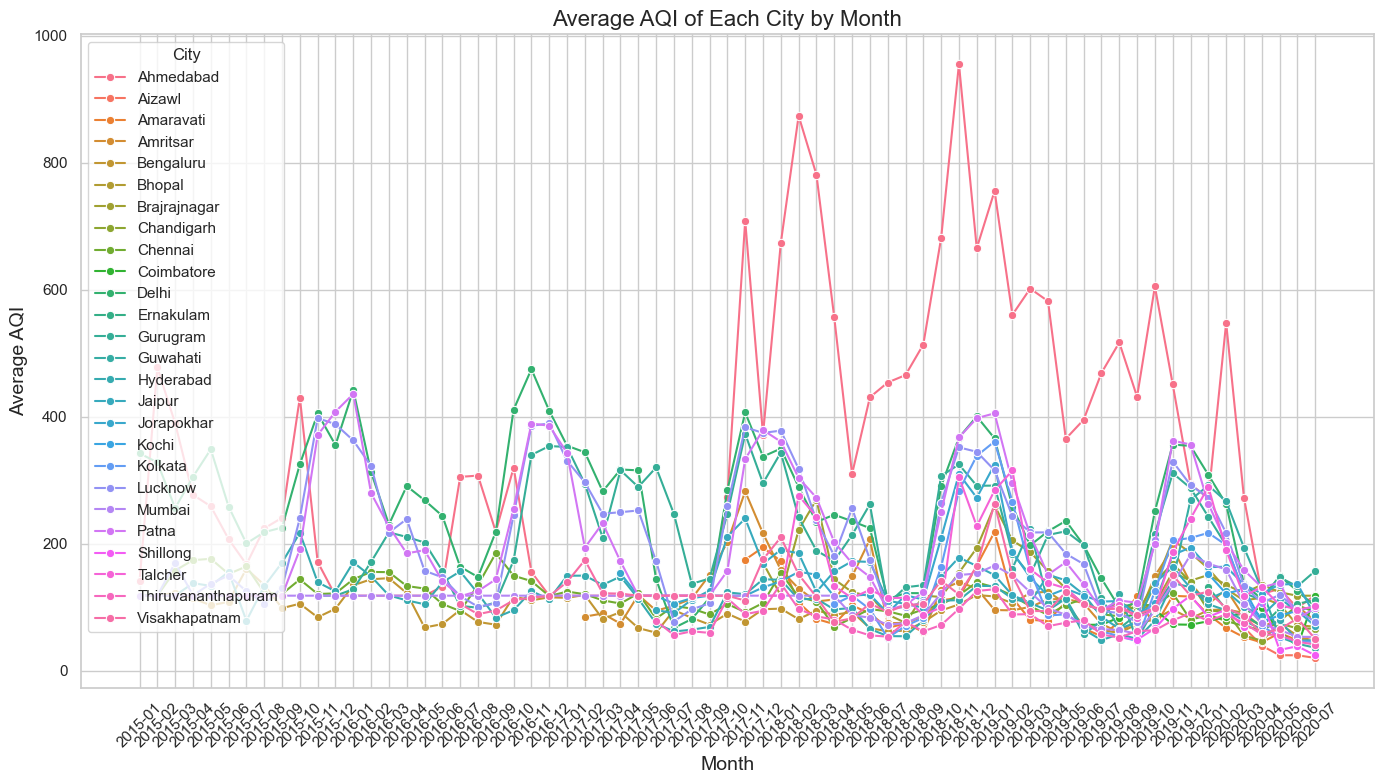

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame
df = data

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.to_period('M')

# Calculate the average AQI for each city by month
average_aqi = df.groupby(['City', 'Month'])['AQI'].mean().reset_index()

# Convert 'Month' to string before plotting
# This allows Seaborn to handle the x-axis properly
average_aqi['Month'] = average_aqi['Month'].astype(str)

# Set plot style
sns.set(style='whitegrid')

# Plot average AQI of each city by month
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_aqi, x='Month', y='AQI', hue='City', marker='o')

# Set plot titles and labels
plt.title('Average AQI of Each City by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()

# Show the plot
plt.show()

Predictive Analysis 

In [23]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

Removing duplicates before trainning

In [20]:
# Load the data
df = data  # Replace with actual dataset file path

# Step 1: Remove exact duplicate rows
df_cleaned = df.drop_duplicates()

# Step 2: Remove duplicates based on key columns (e.g., 'Date' and 'City')
df_cleaned = df_cleaned.drop_duplicates(subset=['Date', 'City'], keep='first')

# Step 3: Check for remaining missing values
missing_values = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Month         0
dtype: int64


In [21]:
df_cleaned.fillna(method='ffill', inplace=True)

# Display the cleaned data
print("Cleaned Dataset:\n", df_cleaned.head())

Cleaned Dataset:
         City       Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket    Month  
0  27.64  133.36     0.00     0.02    0.00  118.0   Moderate  2015-01  
1  24.55   34.06     3.68     5.50    3.77  118.0   Moderate  2015-01  
2  29.07   30.70     6.80    16.40    2.25  118.0   Moderate  2015-01  
3  18.59   36.08     4.43    10.14    1.00  118.0   Moderate  2015-01  
4  39.33   39.31     7.01    18.89    2.78  118.0   Moderate  2015-01  


C:\Users\prgup\AppData\Local\Temp\ipykernel_5280\3165141635.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)


C:\Users\prgup\AppData\Local\Temp\ipykernel_5280\1661745469.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  city_data = df[df['City'] == 'Delhi'][numeric_columns].resample('M').mean()  # Monthly mean AQI for simplicity
C:\Users\prgup\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\prgup\AppData\Local\Temp\ipykernel_5280\1661745469.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=X_test.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


Mean Absolute Error: 51.87
Root Mean Squared Error: 61.10


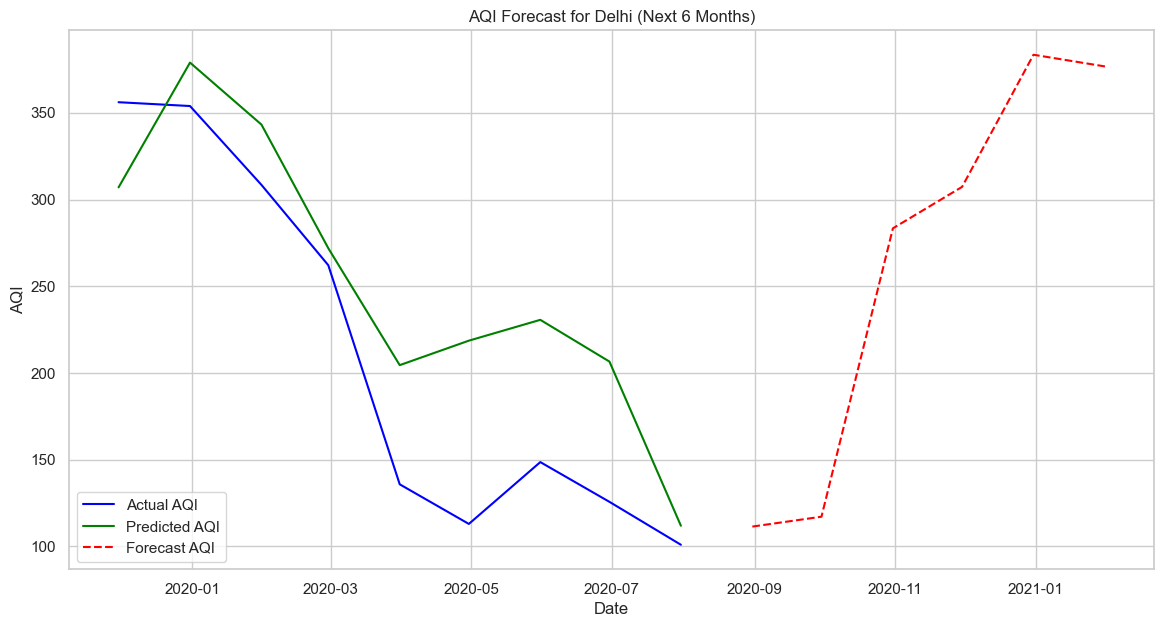

In [27]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the cleaned data
df = pd.read_csv('city_day.csv')  # Replace with the path to your cleaned dataset

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select data for one city (e.g., 'Delhi') and resample to monthly data
# Only select numeric columns for calculating the mean
numeric_columns = df.select_dtypes(include=np.number).columns
city_data = df[df['City'] == 'Delhi'][numeric_columns].resample('M').mean()  # Monthly mean AQI for simplicity


# Feature Engineering: Create lagged features (previous AQI values)
city_data['AQI_lag1'] = city_data['AQI'].shift(1)
city_data['AQI_lag2'] = city_data['AQI'].shift(2)
city_data['Month'] = city_data.index.month
city_data['Year'] = city_data.index.year

# Drop rows with NaN values created by lag features
city_data = city_data.dropna()

# Define features (X) and target (y)
X = city_data[['AQI_lag1', 'AQI_lag2', 'Month', 'Year']]
y = city_data['AQI']

# Split the data into training and testing sets (last 20% for testing)
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train the XGBoost model
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgbr.fit(X_train, y_train)

# Predict on test data and evaluate
y_pred = xgbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Forecast the next 6 months
future_dates = pd.date_range(start=X_test.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
forecast_df = pd.DataFrame(index=future_dates, columns=X.columns)

# Iteratively predict the next 6 months using previous predictions as input
future_forecast = []  # Store forecasts
# Inside the forecasting loop:
for i in range(6):
    last_known = forecast_df.index[i] - pd.DateOffset(months=1)
    # Ensure correct data types:
    forecast_df.loc[future_dates[i], 'AQI_lag1'] = y_pred[-1] if i == 0 else future_forecast[i - 1]
    forecast_df.loc[future_dates[i], 'AQI_lag2'] = X.loc[last_known, 'AQI_lag2'] if i == 0 else y_pred[-2] if i == 1 else future_forecast[i - 2]
    forecast_df.loc[future_dates[i], 'Month'] = future_dates[i].month
    forecast_df.loc[future_dates[i], 'Year'] = future_dates[i].year

    # **Convert columns to numeric type before prediction**
    forecast_df = forecast_df.astype(float)  # Convert entire DataFrame to float
    # Or:
    # forecast_df['AQI_lag1'] = forecast_df['AQI_lag1'].astype(float)
    # forecast_df['AQI_lag2'] = forecast_df['AQI_lag2'].astype(float)
    # forecast_df['Month'] = forecast_df['Month'].astype(int) # Month and Year are better to have int type
    # forecast_df['Year'] = forecast_df['Year'].astype(int)
    
    # Predict and append to future_forecast
    future_forecast.append(xgbr.predict(forecast_df.iloc[[i]])[0])


# Plot actual, predicted, and forecasted AQI
plt.figure(figsize=(14, 7))
plt.plot(city_data.index[-len(y_test):], y_test, label='Actual AQI', color='blue')
plt.plot(city_data.index[-len(y_test):], y_pred, label='Predicted AQI', color='green')
plt.plot(future_dates, future_forecast, label='Forecast AQI', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Forecast for Delhi (Next 6 Months)')
plt.legend()
plt.show()
